In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
def get_data(filename):
    with open(filename) as f:
        return [list(ln.strip()) for ln in f.readlines()]


In [3]:
data = get_data("test")
# data = get_data('input')
# data

In [4]:
def get_neighbors(x, y, x_lim, y_lim):
    neighbors = []
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            if dx != 0 or dy != 0:
                neighbors.append((x + dx, y + dy))
    return [
        (x, y)
        for x, y in neighbors
        if (x >= 0 and y >= 0) and (x < x_lim and y < y_lim)
    ]
    # return [(x, y) for x, y in neighbors if ]


def iter_days(grid: np.matrix):
    def discharge(x, y):
        if f"{x},{y}" in discharged:
            return

        discharged.add(f"{x},{y}")
        # print(get_neighbors(x,y, *grid.shape))
        for d_x, d_y in get_neighbors(x, y, *grid.shape):
            grid[d_x, d_y] = grid[d_x, d_y] + 1
            if grid[d_x, d_y] > 9:
                discharge(d_x, d_y)

    while True:
        grid += 1
        discharged = set()
        discharges = np.array(np.where(grid > 9)).transpose()
        for dis in discharges:
            discharge(*dis)
        grid[grid > 9] = 0
        yield grid


In [5]:
def drawGrid(data, vmin=0, vmax=10):
    extent = (0, data.shape[1], data.shape[0], 0)
    _, ax = plt.subplots()
    ax.imshow(data, cmap="gist_gray_r", vmin=vmin, vmax=vmax, extent=extent)
    ax.grid(color="#bfacac", linewidth=2, which="both")
    ax.set_frame_on(False)


In [6]:
def prep_run(filename):
    data = get_data(filename)
    # data = get_data('input')

    matrix = np.matrix(data, dtype=np.int32)
    grid_gen = iter_days(matrix)
    iterCount = 0
    flashes = 0
    return grid_gen, matrix, iterCount, flashes
    # matrix


matrix([[5, 4, 8, 3, 1, 4, 3, 2, 2, 3],
        [2, 7, 4, 5, 8, 5, 4, 7, 1, 1],
        [5, 2, 6, 4, 5, 5, 6, 1, 7, 3],
        [6, 1, 4, 1, 3, 3, 6, 1, 4, 6],
        [6, 3, 5, 7, 3, 8, 5, 4, 7, 8],
        [4, 1, 6, 7, 5, 2, 4, 6, 4, 5],
        [2, 1, 7, 6, 8, 4, 1, 7, 2, 1],
        [6, 8, 8, 2, 8, 8, 1, 1, 3, 4],
        [4, 8, 4, 6, 8, 4, 8, 5, 5, 4],
        [5, 2, 8, 3, 7, 5, 1, 5, 2, 6]], dtype=int32)

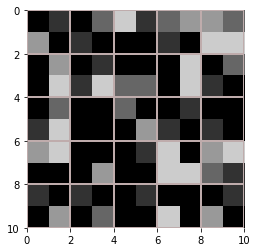

In [7]:
grid_gen, g, iterCount, flashes = prep_run("test")
drawGrid(g, vmax=5)
g


iterCount = 1 | flashes = 35


matrix([[8, 8, 0, 7, 4, 7, 6, 5, 5, 5],
        [5, 0, 8, 9, 0, 8, 7, 0, 5, 4],
        [8, 5, 9, 7, 8, 8, 9, 6, 0, 8],
        [8, 4, 8, 5, 7, 6, 9, 6, 0, 0],
        [8, 7, 0, 0, 9, 0, 8, 8, 0, 0],
        [6, 6, 0, 0, 0, 8, 8, 9, 8, 9],
        [6, 8, 0, 0, 0, 0, 5, 9, 4, 3],
        [0, 0, 0, 0, 0, 0, 7, 4, 5, 6],
        [9, 0, 0, 0, 0, 0, 0, 8, 7, 6],
        [8, 7, 0, 0, 0, 0, 6, 8, 4, 8]], dtype=int32)

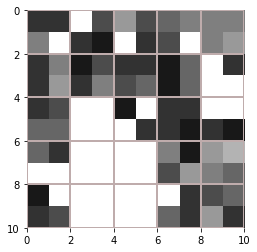

In [8]:
g = next(grid_gen)
g = next(grid_gen)
iterCount += 1
flashes += sum(np.array(g).flatten() < 1)
print(f"{iterCount = } | {flashes = }")

# g[0,2] = 100
drawGrid(g)
g

In [35]:
def prep_plt():
    fig, ax = plt.subplots(1)
    fig.set_size_inches(12,12)
    def take_pick(grid, filename):
        ax.imshow(grid, cmap='gist_gray_r', vmin=0, vmax=9)
        fig.savefig(filename+'.png')
    return take_pick

303
313
323
333
343
iterCount = 351 | flashes = 5049


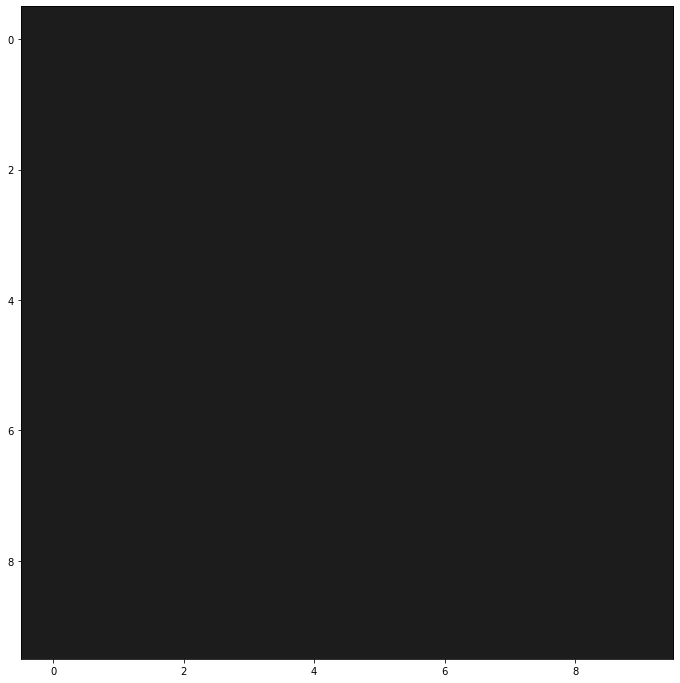

In [38]:
grid_gen, g, iterCount, flashes = prep_run("input")
record = prep_plt()
for i in range(351):
    g = next(grid_gen)
    iterCount += 1
    flashes += sum(np.array(g).flatten() < 1)
    # record(g, f"img/Dumbo_Octopus_{iterCount:03d}")
    if g.sum() == 0:
        print(iterCount)
    # print(g, end='\n\n')

print(f"{iterCount = } | {flashes = }")
